In [1]:
#Python imports
import pandas as pd
import numpy as np

#Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns


# Wrangle
from env import github_token, github_username
import acquire
from acquire import scrape_github_data, headers
from prepare import basic_clean, lemmatize, remove_stopwords

#NLP
import requests
import nltk
import unicodedata
import re

#Modeling
from prepare import split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer




#Wordclouds
from PIL import Image
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/christophermayorga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/christophermayorga/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Use the scrape github function from the acquire module to acquire the dataframe containing the names of the
#repositories and the contents of the readme files
df = acquire.scrape_github_data()

#Convert the data into a dataframe
df = pd.DataFrame(df)
df.head(50)

,repo,language,readme_contents
0,nytimes/covid-19-data,None,# Coronavirus (Covid-19) Data in the United St...
1,covid19india/covid19india-react,JavaScript,"<p align=""center"">\n<img src=""https://reposito..."
2,owid/covid-19-data,Python,# COVID-19 Dataset by _Our World in Data_ \n[!...
3,SeanNaren/CORD-19-ANN,Python,# CORD-19-ANN\n\n![cord_website](imgs/cord_ann...
4,geohot/corona,Python,# Reverse engineering the coronavirus (SARS-Co...
5,ahmadawais/corona-cli,JavaScript,"<h4 align=""center"">\n <a href=""https://gith..."
6,corona-warn-app/cwa-server,Java,<!-- markdownlint-disable MD041 -->\n<h1 align...
7,ExpDev07/coronavirus-tracker-api,Python,"<h1 align=""center"">\n Coronavirus Tracker A..."
8,mhdhejazi/CoronaTracker,Swift,"<img src=""https://user-images.githubuserconten..."
9,soroushchehresa/awesome-coronavirus,JavaScript,"<div align=""center"">\n\t<br>\n\t<img src=""http..."


In [3]:
#Check number of rows/ columns
df.shape

(100, 3)

In [4]:
#Column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             100 non-null    object
 1   language         89 non-null     object
 2   readme_contents  100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [5]:
#Dataframe stats
df.describe()

,repo,language,readme_contents
count,100,89,100
unique,98,16,98
top,ayushi7rawat/CoWin-Vaccine-Notifier,Python,# [CoWin-Vaccine-Notifier]()\nAutomated Python...
freq,2,29,2


In [6]:
#Drop any df duplicates
df = df.drop_duplicates().dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 1 to 99
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             87 non-null     object
 1   language         87 non-null     object
 2   readme_contents  87 non-null     object
dtypes: object(3)
memory usage: 2.7+ KB


In [7]:
extras = ['aligncenter',
         'width100px',
         'aligncentera',
         'td',
         'tr',
         'img',
         'ha',
         'li',
         'p',
         'classtg',
         'pull',
         'request',
         'json',
         'table']

In [8]:
#Rename readme_contents column
df = df.rename({'readme_contents':'original'},axis=1)

#Apply functions from prepare script
df['clean'] = df.original.apply(basic_clean)
df['lemmatized'] = df.clean.apply(lemmatize)
df['stopwords_removed'] = df.lemmatized.apply(lambda x: remove_stopwords(x, extra_words=extras))
df.head()

,repo,language,original,clean,lemmatized,stopwords_removed
1,covid19india/covid19india-react,JavaScript,"<p align=""center"">\n<img src=""https://reposito...",p aligncenter\nimg srchttpsrepositoryimagesgit...,p aligncenter img srchttpsrepositoryimagesgith...,srchttpsrepositoryimagesgithubusercontentcom24...
2,owid/covid-19-data,Python,# COVID-19 Dataset by _Our World in Data_ \n[!...,covid19 dataset by our world in data \nwebsit...,covid19 dataset by our world in data website s...,covid19 dataset world data website shieldsioht...
3,SeanNaren/CORD-19-ANN,Python,# CORD-19-ANN\n\n![cord_website](imgs/cord_ann...,cord19ann\n\ncordwebsiteimgscordannexamplegif...,cord19ann cordwebsiteimgscordannexamplegif ope...,cord19ann cordwebsiteimgscordannexamplegif ope...
4,geohot/corona,Python,# Reverse engineering the coronavirus (SARS-Co...,reverse engineering the coronavirus sarscov2\...,reverse engineering the coronavirus sarscov2 s...,reverse engineering coronavirus sarscov2 start...
5,ahmadawais/corona-cli,JavaScript,"<h4 align=""center"">\n <a href=""https://gith...",h4 aligncenter\n a hrefhttpsgithubcomahmada...,h4 aligncenter a hrefhttpsgithubcomahmadawaisc...,h4 hrefhttpsgithubcomahmadawaiscoronacli srcht...


In [9]:
# join all text with stopwords removed 
all_words = ' '.join(df.stopwords_removed)
all_words

"srchttpsrepositoryimagesgithubusercontentcom24738651967519080869111ea94810732fb55380b width100 here's data hrefhttpsapicovid19indiaorgapia setup yarn install yarn start contribution new contributing open source github guidehttpsguidesgithubcomactivitiescontributingtoopensource help get started please check contribution guidecontributingmd detail issue work repository small subset work put together much larger pool voluntary effort contributed generous people around world reach u hellocovid19indiaorg covid19 dataset world data website shieldsiohttpsimgshieldsiowebsiteupdowngreenredhttpshieldsiosvghttpsourworldindataorgcoronavirus datahttpsimgshieldsiobadgepublicdatapurplepublicdata open source love svg3httpsbadgesfrapsoftcomosv3opensourcesvgv103httpsgithubcomellerbrockopensourcebadges find data covid19 documentation publicdatapublicdata documentation data complete covid19 datasetpublicdatareadmemd data covid19 vaccinationspublicdatavaccinationsreadmemd data excess mortalitypublicdataex

In [10]:
# we can transform it into a pandas Series
all_words = pd.Series(all_words.split())
all_words.value_counts().head(20)

data           903
covid19        755
case           354
coronavirus    300
file           246
country        243
run            242
use            200
using          199
source         196
code           191
1              183
project        166
model          164
death          163
number         159
state          157
health         146
0              145
time           145
dtype: int64

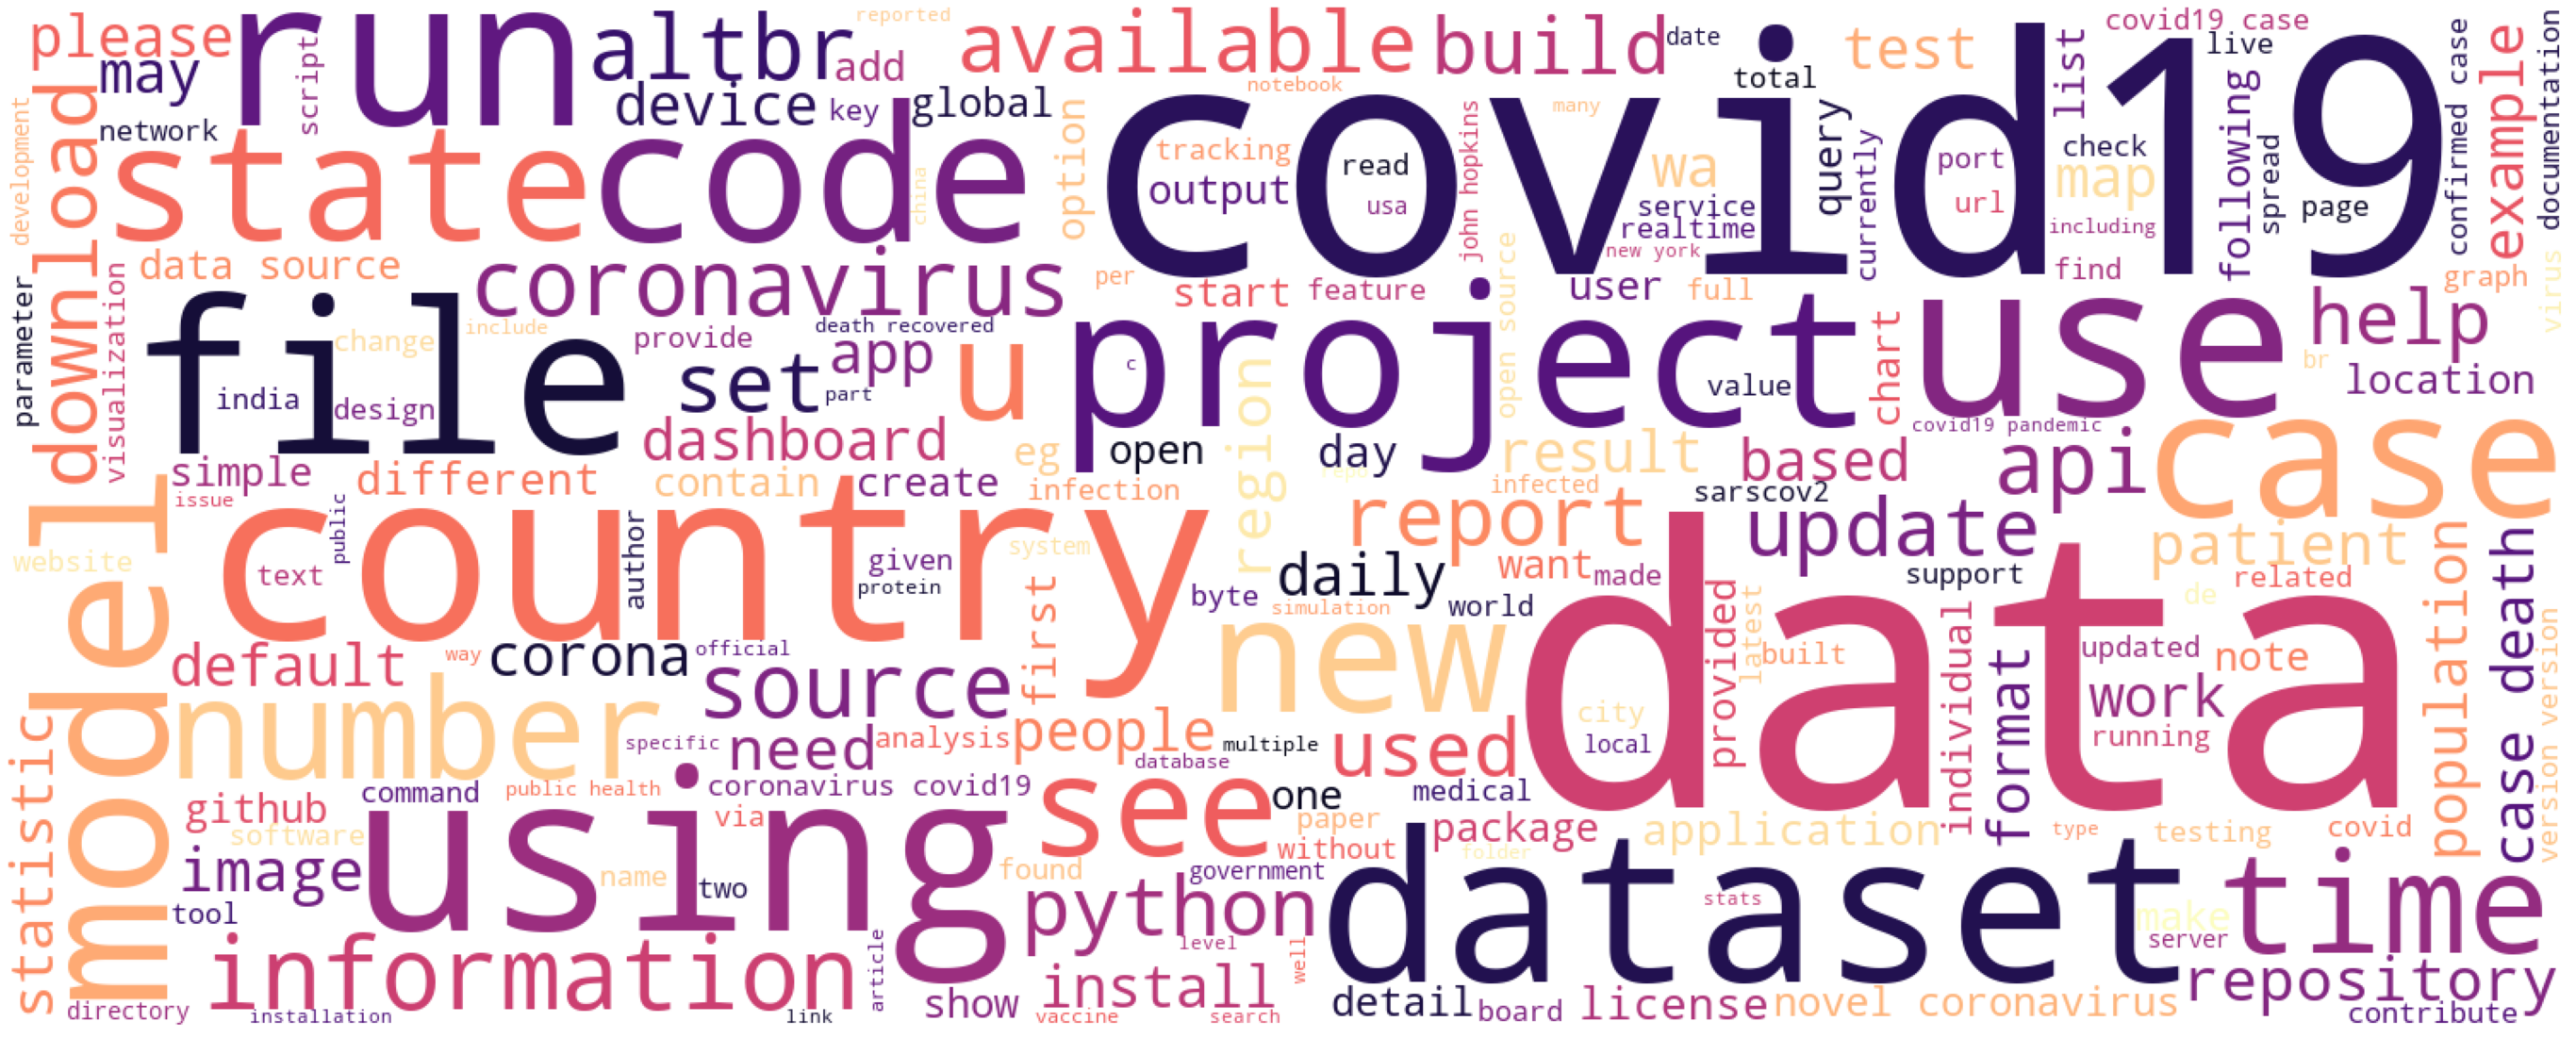

In [11]:
# Wordcloud based on all words accross repositories using all_words series
all_cloud = WordCloud(background_color='white', colormap='magma', height=600, width=1500,random_state=123).generate(' '.join(all_words))
plt.figure(figsize=(100,20))
plt.axis('off')
plt.imshow(all_cloud)

In [12]:
# Produce the most frequently occuring bigrams
top_20_starred_repo_bigrams = (pd.Series(nltk.ngrams(all_words, 2))
                      .value_counts()
                      .head(20))

top_20_starred_repo_bigrams

(novel, coronavirus)      54
(data, source)            48
(coronavirus, covid19)    46
(covid19, case)           46
(open, source)            44
(confirmed, case)         37
(covid19, data)           37
(case, death)             36
(john, hopkins)           32
(public, health)          32
(covid19, pandemic)       29
(new, york)               28
(south, africa)           27
(department, health)      27
(number, case)            21
(coronavirus, case)       21
(around, world)           20
(command, line)           20
(web, app)                20
(default, 0)              20
dtype: int64

In [13]:
starred_repo_bigrams = top_20_starred_repo_bigrams[3:]

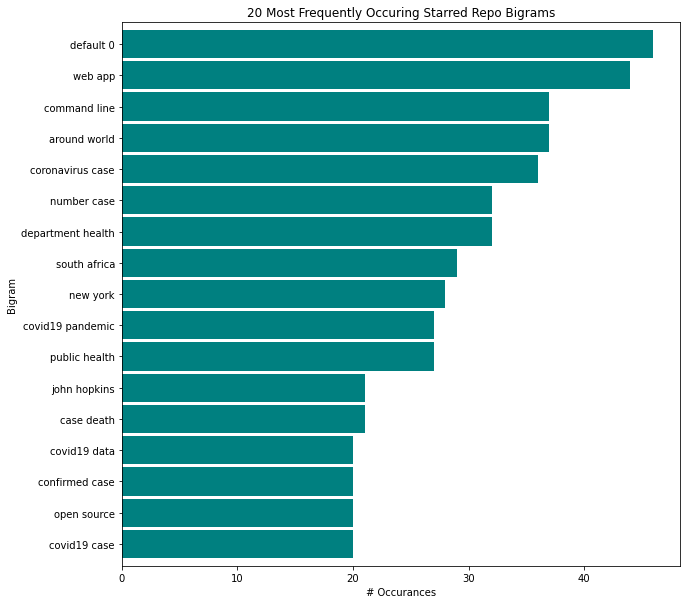

In [14]:
#Visualize 20 most frequently occuring bigrams
starred_repo_bigrams.sort_values().plot.barh(color='teal', width=.9, figsize=(10, 10))

plt.title('20 Most Frequently Occuring Starred Repo Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = starred_repo_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

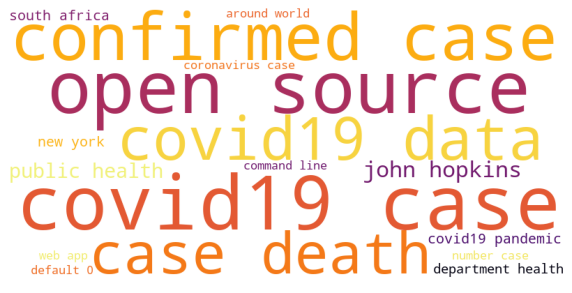

In [15]:
data = {k[0] + ' ' + k[1]: v for k, v in starred_repo_bigrams.to_dict().items()}
img = WordCloud(background_color='white',colormap='inferno', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [16]:
top_30_starred_repo_trigrams = (pd.Series(nltk.ngrams(all_words, 3))
                      .value_counts()
                     )

top_30_starred_repo_trigrams

(confirmed, case, death)                                                                                                                                                                                                                 19
(classtgwraptable, th, classtg7btt)                                                                                                                                                                                                      18
(div, classtgwraptable, th)                                                                                                                                                                                                              18
(2019, novel, coronavirus)                                                                                                                                                                                                               16
(th, classtg7bttnormaltd, classtg7bttpneumoniatd)       